Esse notebook  é réplica do exemplo do  site https://www.geeksforgeeks.org/linear-regression-using-tensorflow/


Vamos começar importando as bibliotecas necessárias. Nós usaremos o **Numpy** juntamente com o **Tensorflow** para cálculos e o **Matplotlib** para plotagem.

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

print(tf)

<module 'tensorflow' from '/opt/conda/lib/python3.6/site-packages/tensorflow/__init__.py'>


Para tornar os números aleatórios previsíveis, definiremos sementes fixas para Numpy e Tensorflow. e vamos gerar alguns dados aleatórios para treinar o Modelo de Regressão Linear.

In [2]:
np.random.seed(101) 
tf.set_random_seed(101) 

# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

print('x=', x)
print('y=', y)

x= [ 0.13118902  1.58574886 -1.73138986  0.43339774  5.56384851  7.77321572
  4.57817874 10.29176178  9.9356162   6.7031851  10.63790236 10.04154543
  9.70003718 15.55012022 18.00958007 13.16495174 12.99502208 18.17532615
 20.199289   17.59766573 21.8906139  21.57151122 18.83685589 20.57234166
 21.98553533 29.46474729 26.69593542 28.18133669 30.44998104 29.92753091
 33.91747336 34.09601427 31.87704387 32.53126413 38.31689127 34.46333834
 39.65549241 40.39732374 39.0808018  43.17567335 37.59349837 38.65951464
 44.46920122 47.00138997 42.17444159 44.12294771 48.31870775 45.27360867
 50.59056093 49.90108178]
y= [ 1.44542215  1.1927937  -1.61201012  0.85271732  4.68327335  2.0655101
  6.12338269  4.24693369  4.58573251  6.60988885  9.74302668 14.24518839
 15.83901099 13.09064546 13.97466902 16.4044347  14.92339458 14.28756352
 14.77615491 20.48902432 22.90629042 22.79065479 23.66312122 22.8659393
 25.74255861 23.18349607 27.8100084  27.7880076  30.55959153 26.34189158
 32.8884197  33.13058

Vamos visualizar os dados de treinamento

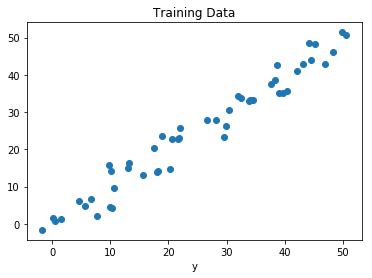

In [3]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [4]:
#Vamos começar a criar nosso modelo definindo os  placeholders X e Y, para podemos alimentarmos com os dados de treinamento.
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


#Vamos declarar duas Variáveis do Tensorflow para Weights(pesos) e Bias(viés) iniciando-ao aleatoriamente usando np.random.randn()
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


#Definimos os hiperparametros do modelo, Learning Rate (taxa de aprendizagem) e o número de Epochs (interações)
learning_rate = 0.01
training_epochs = 1000


#Vamos construir a Hypothesis (hipótese), a Cost Function (função custo) e o Optimizer (optimizador).
#Não vamos implementar o Gradient Descent Optimizer manualmente, pois ele é criado dentro do Tensorflow.
#Depois disso, estaremos inicializando as variáveis.

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [5]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.886804 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 5.7912707 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.73893565
Epoch 300 : cost = 5.544605 W = 1.0072418 b = 0.6455924
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56222016
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775372
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124188
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183503
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.3087744
Epoch 600 : cost = 5.3848577 W = 1.0150996 b = 0.26138142
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905117
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124233
Epoch 750 : cost = 5.346891 W = 1.0174292 b = 0.14747268
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730959
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.09036876
Epoch 900 : cost = 5.322459 W

In [6]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 5.3110337 Weight = 1.0199214 bias = 0.02561676 



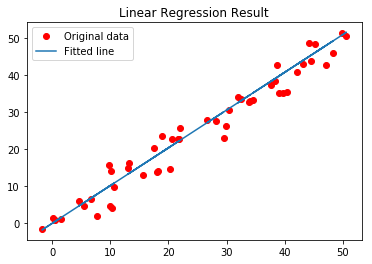

In [7]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 
